In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./Graduate Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,0.92,1
1,2,324,107,4,4.0,4.5,8.87,0.76,1
2,3,316,104,3,3.0,3.5,8.00,0.72,1
3,4,322,110,3,3.5,2.5,8.67,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0.65,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,0.82,1
396,397,325,107,3,3.0,3.5,9.11,0.84,1
397,398,330,116,4,5.0,4.5,9.45,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0.67,0


In [3]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64

In [4]:
df.set_index('Serial No.',inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,0.92,1
2,324,107,4,4.0,4.5,8.87,0.76,1
3,316,104,3,3.0,3.5,8.00,0.72,1
4,322,110,3,3.5,2.5,8.67,0.80,1
5,314,103,2,2.0,3.0,8.21,0.65,0


In [6]:
x = df.iloc[:,:-1]
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,0.92
2,324,107,4,4.0,4.5,8.87,0.76
3,316,104,3,3.0,3.5,8.00,0.72
4,322,110,3,3.5,2.5,8.67,0.80
5,314,103,2,2.0,3.0,8.21,0.65


In [7]:
y = df['Admit']
y.head()

Serial No.
1    1
2    1
3    1
4    1
5    0
Name: Admit, dtype: int64

In [8]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admit'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =pd.DataFrame(sc.fit_transform(x),columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR', 'CGPA',
       'Research'])

In [10]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1.373648
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.250297
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,-0.030541
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.531135
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-0.522007


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=100)

In [12]:
y_train

Serial No.
164    0
230    1
214    1
189    1
387    0
      ..
344    0
360    0
324    0
281    1
9      0
Name: Admit, Length: 300, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train[:])

LogisticRegression()

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
cm = confusion_matrix(y_test,y_pred=y_pred)
cm

array([[33, 15],
       [ 6, 46]], dtype=int64)

In [18]:
print(accuracy_score(y_test, y_pred))

0.79


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        48
           1       0.75      0.88      0.81        52

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



## Above we did not remove any outlier. Let's try again with removing some outliers

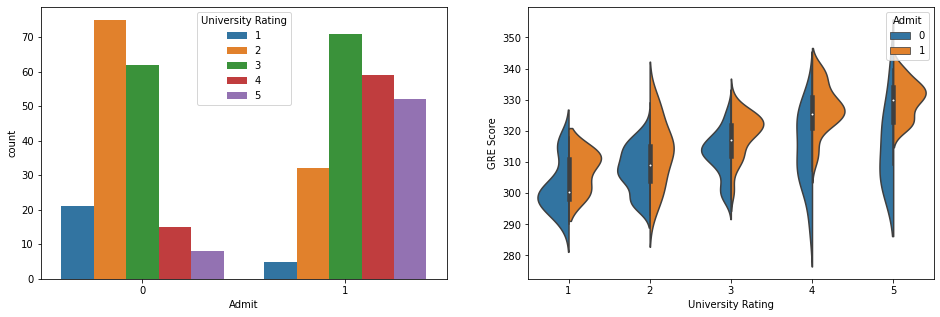

In [20]:
fig = plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot('Admit',data=df,hue='University Rating')
plt.subplot(1,2,2)
sns.violinplot(x='University Rating',y='GRE Score',data=df,hue='Admit',split=True)

Text(0.5, 0, 'CGPA who not Admitted')

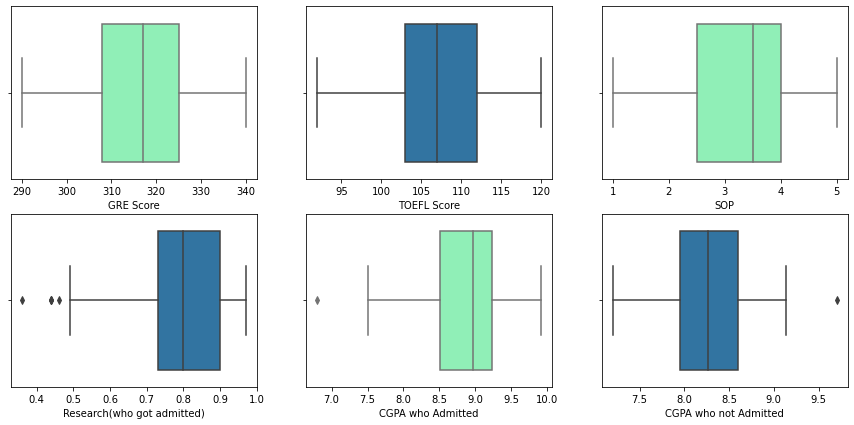

In [21]:
fig = plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.boxplot(x=['GRE Score'],data=df,palette='rainbow')
plt.xlabel('GRE Score')
plt.subplot(2,3,2)
sns.boxplot(x=['TOEFL Score'],data=df)
plt.xlabel('TOEFL Score')
plt.subplot(2,3,3)
sns.boxplot(x=['SOP'],data=df,palette='rainbow')
plt.xlabel('SOP')
plt.subplot(2,3,4)
sns.boxplot(x=['Research'],data=df[df['Admit']  == 1 ])
plt.xlabel('Research(who got admitted)')
plt.subplot(2,3,5)
sns.boxplot('CGPA',data=df[df['Admit'] == 1],palette='rainbow')
plt.xlabel('CGPA who Admitted')
plt.subplot(2,3,6)
sns.boxplot('CGPA',data=df[df['Admit'] == 0])
plt.xlabel('CGPA who not Admitted')

### In the Above Box plots we find some Outliers .Let's Remove them

In [22]:
df[(df['Admit'] == 1) & (df['Research'] < 0.5) ]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,,,,,,,,
28,298,98,2,1.5,2.5,7.50,0.44,1
41,308,110,3,3.5,3.0,8.00,0.46,1
42,316,105,2,2.5,2.5,8.20,0.49,1
59,300,99,1,3.0,2.0,6.80,0.36,1
79,296,95,2,3.0,2.0,7.54,0.44,1
94,301,97,2,3.0,3.0,7.88,0.44,1


In [23]:
df.drop([59,79,28,94],inplace=True)

In [24]:
df.drop([41],inplace=True)

In [25]:
df[df['Admit'] == 0].sort_values('CGPA',ascending=False).head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,,,,,,,,
48,339,119,5,4.5,4.0,9.7,0.89,0


In [26]:
df[df['CGPA']<7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,,,,,,,,


In [27]:
# df.drop(index=59,axis=0,inplace=True)

In [28]:
df.drop(index=48,axis=0,inplace=True)

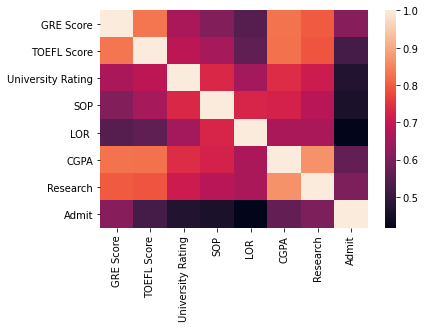

In [29]:
sns.heatmap(df.corr())

In [30]:
x = df.iloc[:,:-1]
y = df['Admit']
sc = StandardScaler()
x =pd.DataFrame(sc.fit_transform(x),columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR', 'CGPA','Research'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=100)
classifier = LogisticRegression()
classifier.fit(x_train, y_train[:])

LogisticRegression()

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
cm = confusion_matrix(y_test,y_pred=y_pred)
cm

array([[43, 10],
       [ 4, 42]], dtype=int64)

In [33]:
print(accuracy_score(y_test, y_pred))

0.8585858585858586


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        53
           1       0.81      0.91      0.86        46

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.87      0.86      0.86        99



#### Here we can see the difference in the accuracy

### Now Let's Apply KNN to the same data and Observe the Accuracy with Different K values

In [35]:
from sklearn.neighbors import KNeighborsClassifier
l = []
for i in range(3,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    l.append([i,accuracy_score(y_test,pred)])
pd.DataFrame(l,columns=['K Values','Accuracy'])

,K Values,Accuracy
0,3,0.767677
1,4,0.767677
2,5,0.787879
3,6,0.777778
4,7,0.787879
5,8,0.787879
6,9,0.787879
7,10,0.808081
8,11,0.797980
9,12,0.808081
